# Nonlinear Equations and Optimization

In this chapter we will review two basic operations that are fundamental for the development of Numerical Mathematics: the search of zeros and extrema of real-valued functions.

## Motivation

Let us revisit Runge's example from chapter 2, where we computed a Lagrange interpolation of Runge's function using eleven equally spaced nodes in the interval from -5 to 5.

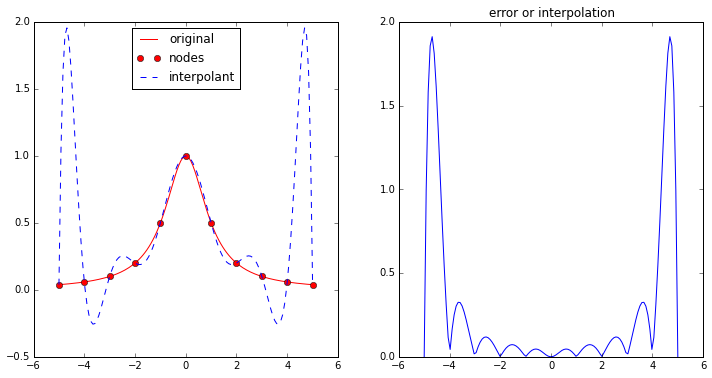

In [1]:
In [1]: import numpy as np, matplotlib.pyplot as plt; \
   ...: from scipy.interpolate import BarycentricInterpolator

%matplotlib inline
    
In [2]: def f(t): return 1. / (1. + t**2)
    
In [3]: nodes = np.linspace(-5, 5, 11); \
   ...: domain = np.linspace(-5, 5, 128); \
   ...: interpolant = BarycentricInterpolator(nodes, f(nodes))

In [4]: plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(domain, f(domain), 'r-', label='original')
plt.plot(nodes, f(nodes), 'ro', label='nodes')
plt.plot(domain, interpolant(domain), 'b--', label='interpolant')
plt.legend(loc=9)
plt.subplot(122)
plt.plot(domain, np.abs(f(domain)-interpolant(domain)))
plt.title('error or interpolation')
plt.show()

One way to measure the success or failure of this scheme is by computing the uniform norm of the difference between the original function and the interpolation.  We may approximate this value by performing the following computation on a large set of points in the domain:


In [2]:
In [4]: error1a = np.abs(f(domain)-interpolant(domain)).max(); \
   ...: print error1a

1.91232007608


But this is just a good approximation to the actual error.  To compute the  true norm, we need a mechanism that calculates the actual maximum value of a function over a finite interval, rather than over a discrete set of points.   To perform this operation for the current example, we will use the routine `minimize_scalar` from the module `scipy.optimize`.  

Let us solve this problem in two different ways, to illustrate one possible pitfall of optimization algorithms: In the first case we will exploit the symmetry of the problem (both `f` and `interpolator` are even functions!) and extract the maximum value of the norm of their difference in the interval from 0 to 5.  In the second case, we perform the same operation over the full interval from -5 to 5.   We will draw conclusions after the computations:

In [3]:
In [6]: from scipy.optimize import minimize_scalar

In [7]: def uniform_norm(func, a, b):
   ...:     g = lambda t: -np.abs(func(t))
   ...:     output = minimize_scalar(g, method="bounded", bounds=(a, b))
   ...:     return -output.fun
   ...:

In [8]: def difference(t): return f(t) - interpolant(t)

In [9]: error1b = uniform_norm(difference, 0., 5.)
   ...: print error1b

In [10]: error1c = uniform_norm(difference, -5., 5.); \
   ....: print error1c
   


1.91565891823
0.327614523316


> What did just happen?   The routine `minimize_scalar` uses an iterative algorithm that _got confused_ by the symmetry of the problem, and converged to one local maximum, rather than the requested global maximum. 

> This first example illustrates one of the topics on this chapter (and its dangers!): the computation of constrained extrema for real-valued functions.

The approximation is obviously not very good.  A Theorem by Chebyshev states that the best polynomial approximation is achieved with a smart choice of nodes: the zeros of the Chebyshev polynomials precisely!  We can gather all these roots by using the routine `t_roots` from the module `scipy.special`.  In our running example, the best choice of 11 nodes will be based upon the roots of the 11-degree Chebyshev polynomial, properly _translated_ over the interval of interpolation:

[ -4.94910721e+00  -4.54815998e+00  -3.77874787e+00  -2.70320409e+00
  -1.40866278e+00   1.41638472e-15   1.40866278e+00   2.70320409e+00
   3.77874787e+00   4.54815998e+00   4.94910721e+00]


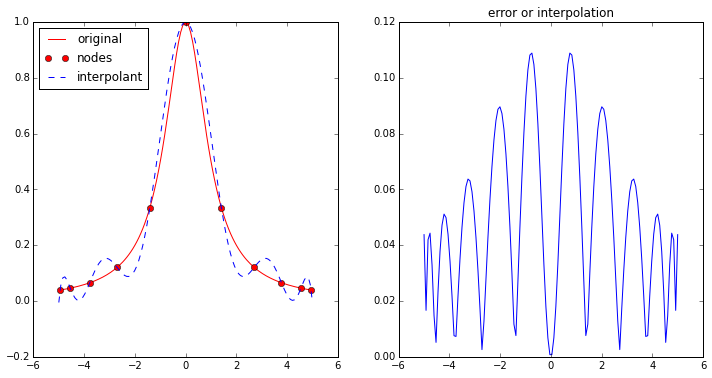

In [8]:
In [11]: from scipy.special import t_roots

In [12]: nodes = 5 * t_roots(11)[0]; \
   ....: print nodes

In [13]: interpolant = BarycentricInterpolator(nodes, f(nodes))
    
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(domain, f(domain), 'r-', label='original')
plt.plot(nodes, f(nodes), 'ro', label='nodes')
plt.plot(domain, interpolant(domain), 'b--', label='interpolant')
plt.legend(loc=2)
plt.subplot(122)
plt.plot(domain, np.abs(f(domain)-interpolant(domain)))
plt.title('error or interpolation')
plt.show()

This is a significant improvement in the quality of the interpolator. All thanks to well-placed nodes that we computed as the roots of a polynomial.  Let us compute the uniform norm of this interpolation.

In [6]:
In [14]: def difference(t): return f(t) - interpolant(t)

In [15]: error2 = uniform_norm(difference, 0, 2.)
   ...: print error2

0.10915351095
